# ML Assignment 5
First i will show simple operations results on dataset and then i will perform assign task in this assignmnet

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn.datasets import fetch_openml

df = sns.load_dataset('diamonds')
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [2]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

<AxesSubplot:>

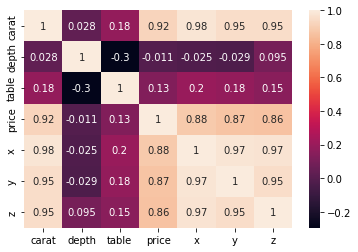

In [3]:
sns.heatmap(df.corr(),annot = True)

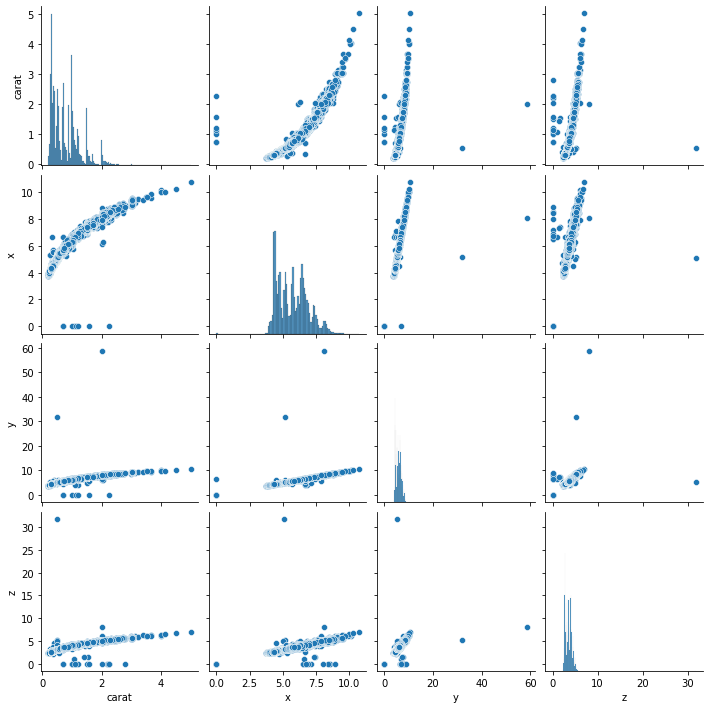

In [4]:
sns.pairplot(df[['carat','x','y','z']])

In [6]:
# BY just Selecting the important ones
X = df[['x','y','z']]
X_features = ['x','y','z']
Xarr = X.values.reshape((-1, 1))
y = df['carat']

In [7]:
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [8]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,  test_size= .15)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(45849, 3) (8091, 3) (45849,) (8091,)


In [9]:
sgdr = SGDRegressor(alpha = 0.001, verbose = 1)
sgdr.fit(xtrain, ytrain)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")


-- Epoch 1
Norm: 0.29, NNZs: 3, Bias: -1.218432, T: 45849, Avg. loss: 0.018498
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 0.33, NNZs: 3, Bias: -1.441146, T: 91698, Avg. loss: 0.006640
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 0.35, NNZs: 3, Bias: -1.516961, T: 137547, Avg. loss: 0.005705
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 0.36, NNZs: 3, Bias: -1.545061, T: 183396, Avg. loss: 0.005543
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 0.36, NNZs: 3, Bias: -1.557940, T: 229245, Avg. loss: 0.005492
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 0.37, NNZs: 3, Bias: -1.562664, T: 275094, Avg. loss: 0.005480
Total training time: 0.05 seconds.
-- Epoch 7
Norm: 0.37, NNZs: 3, Bias: -1.566253, T: 320943, Avg. loss: 0.005465
Total training time: 0.06 seconds.
Convergence after 7 epochs took 0.06 seconds
SGDRegressor(alpha=0.001, verbose=1)
number of iterations completed: 7, number of weight updates: 320944.0


In [10]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:\n w: {w_norm}, \n b:{b_norm}")

model parameters:
 w: [0.36153267 0.00231024 0.07329451], 
 b:[-1.566253]


In [11]:
# make a prediction using sgdr.predict()
y_pred_sgd = sgdr.predict(xtest)

# make a prediction using w,b. 
y_pred = np.dot(xtest, w_norm) + b_norm  
print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}")

print(f"Prediction on test set:\n{y_pred[:10].round(2)}" )
print(f"Target values \n{ytest[:10].values}")

prediction using np.dot() and sgdr.predict match: True
Prediction on test set:
[0.13 1.44 0.29 1.03 1.2  0.93 0.57 1.05 0.79 0.56]
Target values 
[0.26 1.5  0.36 1.02 1.13 0.9  0.54 1.   0.71 0.53]


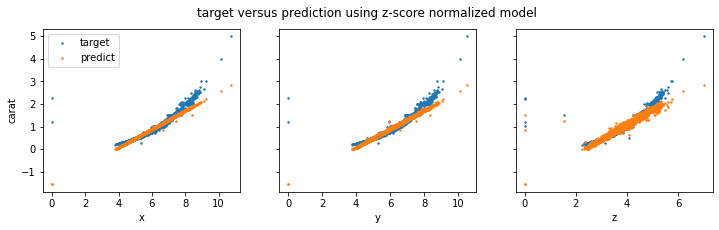

In [12]:
# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,3,figsize=(12,3),sharey=True)
for i,col in enumerate(X_features):
    ax[i].scatter(xtest[col],ytest, label = 'target', s=2)
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(xtest[col],y_pred, label = 'predict', s=2)
ax[0].set_ylabel("carat"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()

In [13]:
X = df['x'].values
x = np.c_[X, X**2]

xtrain,xtest,ytrain,ytest = train_test_split(x,y,  test_size= .15)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(45849, 2) (8091, 2) (45849,) (8091,)


In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(xtrain)
xtrainsc = sc.transform(xtrain)
xtestsc = sc.transform(xtest)

sgdr.fit(xtrainsc, ytrain)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:\n w: {w_norm}, \n b:{b_norm}")

-- Epoch 1
Norm: 0.39, NNZs: 2, Bias: 0.796673, T: 45849, Avg. loss: 0.004077
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 0.45, NNZs: 2, Bias: 0.795762, T: 91698, Avg. loss: 0.002261
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 0.51, NNZs: 2, Bias: 0.796703, T: 137547, Avg. loss: 0.001923
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 0.56, NNZs: 2, Bias: 0.798575, T: 183396, Avg. loss: 0.001696
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 0.60, NNZs: 2, Bias: 0.797519, T: 229245, Avg. loss: 0.001532
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 0.63, NNZs: 2, Bias: 0.796586, T: 275094, Avg. loss: 0.001410
Total training time: 0.05 seconds.
-- Epoch 7
Norm: 0.66, NNZs: 2, Bias: 0.798443, T: 320943, Avg. loss: 0.001316
Total training time: 0.05 seconds.
Convergence after 7 epochs took 0.05 seconds
SGDRegressor(alpha=0.001, verbose=1)
number of iterations completed: 7, number of weight updates: 320944.0
model parameters:
 w: [-0.17134585  0.63919547], 
 b

In [15]:
sgdr.score(xtestsc,ytest)

0.9894826778725417

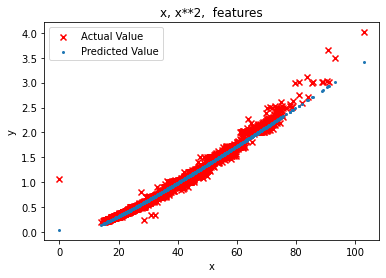

In [16]:
ypred = sgdr.predict(xtestsc) 
plt.scatter(xtest[:,1], ytest, marker='x', c='r', label="Actual Value"); plt.title("x, x**2,  features")
plt.scatter(xtest[:,1],ypred, label="Predicted Value", s = 4); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()

# Task: 1
1: add another polynomial degree 𝑥^3 and explain which is a better fit with better score

In [17]:
X = df['x'].values
x = np.c_[X, X**2,X**3]

xtrain,xtest,ytrain,ytest = train_test_split(x,y,  test_size= .15)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(45849, 3) (8091, 3) (45849,) (8091,)


In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(xtrain)
xtrainsc = sc.transform(xtrain)
xtestsc = sc.transform(xtest)

sgdr.fit(xtrainsc, ytrain)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:\n w: {w_norm}, \n b:{b_norm}")

-- Epoch 1
Norm: 0.34, NNZs: 3, Bias: 0.800610, T: 45849, Avg. loss: 0.002464
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 0.37, NNZs: 3, Bias: 0.798395, T: 91698, Avg. loss: 0.000989
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 0.39, NNZs: 3, Bias: 0.800838, T: 137547, Avg. loss: 0.000918
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 0.40, NNZs: 3, Bias: 0.799598, T: 183396, Avg. loss: 0.000894
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 0.41, NNZs: 3, Bias: 0.800627, T: 229245, Avg. loss: 0.000884
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 0.41, NNZs: 3, Bias: 0.800123, T: 275094, Avg. loss: 0.000879
Total training time: 0.05 seconds.
-- Epoch 7
Norm: 0.42, NNZs: 3, Bias: 0.799494, T: 320943, Avg. loss: 0.000877
Total training time: 0.06 seconds.
Convergence after 7 epochs took 0.06 seconds
SGDRegressor(alpha=0.001, verbose=1)
number of iterations completed: 7, number of weight updates: 320944.0
model parameters:
 w: [-0.07012361  0.17269443  0.37

In [19]:
sgdr.score(xtestsc,ytest)

0.9924750665891453

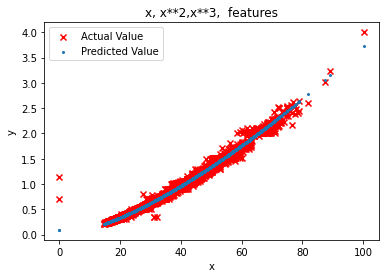

In [20]:
ypred = sgdr.predict(xtestsc) 
plt.scatter(xtest[:,1], ytest, marker='x', c='r', label="Actual Value"); plt.title("x, x**2,x**3,  features")
plt.scatter(xtest[:,1],ypred, label="Predicted Value", s = 4); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()

Polynomial with degree x^2 we get the better fit with score 0.9859242956320872 while polynomial with degree x^3 we get the better fit with better score 0.9935160352349187 approximately both scores are same but polynomial with degree x^3 give us better fit with better score as compared to the degree x^2 So, polynomial with degree x^3 better than degree x^2 in this case. while in some cases degree x^2 may provide better score then degree with x^3 its depend on the situation and behaviour of the data. 

# Task: 2
2: redo this lab for y and z features

In [21]:
# BY just Selecting the important ones
X = df[['y','z']]
X_features = ['y','z']
Xarr = X.values.reshape((-1, 1))
y = df['carat']

In [22]:
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [23]:
print(xtrain.min(),xtest.min(),ytrain.min(),ytest.min())
print(xtrain.max(),xtest.max(),ytrain.max(),ytest.max())

0.0 0.0 0.2 0.2
1238.833224 1003.0030009999999 5.01 4.0


In [27]:
# scaling feature
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(xtrain)
xtrainsc = sc.transform(xtrain)
xtestsc = sc.transform(xtest)

In [29]:
sgdr = SGDRegressor(alpha = 0.5, verbose = 1, max_iter=100000)
sgdr.fit(xtrainsc, ytrain)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

-- Epoch 1
Norm: 0.24, NNZs: 3, Bias: 0.800339, T: 45849, Avg. loss: 0.005394
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 0.23, NNZs: 3, Bias: 0.799538, T: 91698, Avg. loss: 0.004266
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 0.24, NNZs: 3, Bias: 0.800477, T: 137547, Avg. loss: 0.004278
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 0.24, NNZs: 3, Bias: 0.801540, T: 183396, Avg. loss: 0.004270
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 0.23, NNZs: 3, Bias: 0.798982, T: 229245, Avg. loss: 0.004260
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 0.24, NNZs: 3, Bias: 0.801774, T: 275094, Avg. loss: 0.004274
Total training time: 0.05 seconds.
-- Epoch 7
Norm: 0.23, NNZs: 3, Bias: 0.799639, T: 320943, Avg. loss: 0.004259
Total training time: 0.06 seconds.
Convergence after 7 epochs took 0.06 seconds
SGDRegressor(alpha=0.5, max_iter=100000, verbose=1)
number of iterations completed: 7, number of weight updates: 320944.0


In [30]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:\n w: {w_norm}, \n b:{b_norm}")

model parameters:
 w: [0.12515784 0.13510098 0.14315106], 
 b:[0.79963918]


In [31]:
# make a prediction using sgdr.predict()
y_pred_sgd = sgdr.predict(xtestsc)

# make a prediction using w,b. 
y_pred = np.dot(xtest, w_norm) + b_norm  
print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}")

print(f"Prediction on test set:\n{y_pred[:10].round(2)}" )
print(f"Target values \n{ytest[:10].values}")

prediction using np.dot() and sgdr.predict match: False
Prediction on test set:
[19.56 17.86 42.18 17.34 16.35 15.03 58.56 39.44 54.23 96.89]
Target values 
[0.39 0.35 0.91 0.35 0.32 0.3  1.34 0.9  1.21 2.  ]


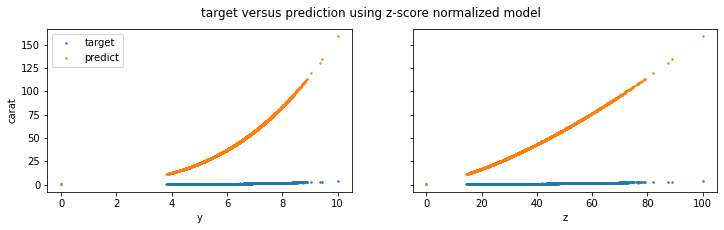

In [32]:
# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,2,figsize=(12,3),sharey=True)
for i,col in enumerate(X_features):
    ax[i].scatter(xtest[:,i],ytest, label = 'target', s=2)
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(xtest[:,i],y_pred, label = 'predict', s=2)
ax[0].set_ylabel("carat"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()

## for y

In [33]:
X = df['y'].values
x = np.c_[X, X**2,X**3,]


print(xtrain.min(),xtest.min(),ytrain.min(),ytest.min())
print(xtrain.max(),xtest.max(),ytrain.max(),ytest.max())

0.0 0.0 0.2 0.2
1238.833224 1003.0030009999999 5.01 4.0


In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(xtrain)
xtrainsc = sc.transform(xtrain)
xtestsc = sc.transform(xtest)

sgdr.fit(xtrainsc, ytrain)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:\n w: {w_norm}, \n b:{b_norm}")

-- Epoch 1
Norm: 0.24, NNZs: 3, Bias: 0.800265, T: 45849, Avg. loss: 0.005443
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 0.23, NNZs: 3, Bias: 0.800695, T: 91698, Avg. loss: 0.004265
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 0.23, NNZs: 3, Bias: 0.800352, T: 137547, Avg. loss: 0.004269
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 0.23, NNZs: 3, Bias: 0.800471, T: 183396, Avg. loss: 0.004270
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 0.23, NNZs: 3, Bias: 0.799788, T: 229245, Avg. loss: 0.004265
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 0.23, NNZs: 3, Bias: 0.800565, T: 275094, Avg. loss: 0.004269
Total training time: 0.05 seconds.
-- Epoch 7
Norm: 0.24, NNZs: 3, Bias: 0.802193, T: 320943, Avg. loss: 0.004270
Total training time: 0.06 seconds.
Convergence after 7 epochs took 0.06 seconds
SGDRegressor(alpha=0.5, max_iter=100000, verbose=1)
number of iterations completed: 7, number of weight updates: 320944.0
model parameters:
 w: [0.12570445 0.1

In [35]:
sgdr.score(xtestsc,ytest)

0.9652655236940768

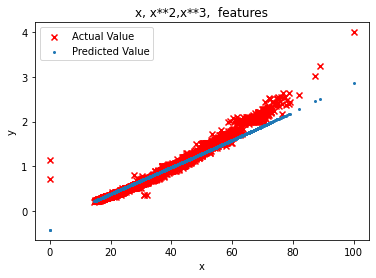

In [36]:
ypred = sgdr.predict(xtestsc) 
plt.scatter(xtest[:,1], ytest, marker='x', c='r', label="Actual Value"); plt.title("x, x**2,x**3,  features")
plt.scatter(xtest[:,1],ypred, label="Predicted Value", s = 4); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()

## for z

In [37]:
X = df['z'].values
x = np.c_[X, X**2,X**3,]


print(xtrain.min(),xtest.min(),ytrain.min(),ytest.min())
print(xtrain.max(),xtest.max(),ytrain.max(),ytest.max())

0.0 0.0 0.2 0.2
1238.833224 1003.0030009999999 5.01 4.0


In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(xtrain)
xtrainsc = sc.transform(xtrain)
xtestsc = sc.transform(xtest)

sgdr.fit(xtrainsc, ytrain)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:\n w: {w_norm}, \n b:{b_norm}")

-- Epoch 1
Norm: 0.23, NNZs: 3, Bias: 0.800367, T: 45849, Avg. loss: 0.005425
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 0.23, NNZs: 3, Bias: 0.798749, T: 91698, Avg. loss: 0.004271
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 0.24, NNZs: 3, Bias: 0.800868, T: 137547, Avg. loss: 0.004276
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 0.23, NNZs: 3, Bias: 0.798265, T: 183396, Avg. loss: 0.004261
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 0.23, NNZs: 3, Bias: 0.798733, T: 229245, Avg. loss: 0.004257
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 0.23, NNZs: 3, Bias: 0.799284, T: 275094, Avg. loss: 0.004272
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 0.23, NNZs: 3, Bias: 0.799741, T: 320943, Avg. loss: 0.004271
Total training time: 0.04 seconds.
Convergence after 7 epochs took 0.04 seconds
SGDRegressor(alpha=0.5, max_iter=100000, verbose=1)
number of iterations completed: 7, number of weight updates: 320944.0
model parameters:
 w: [0.12532941 0.1

In [39]:
sgdr.score(xtestsc,ytest)

0.9645934229879413

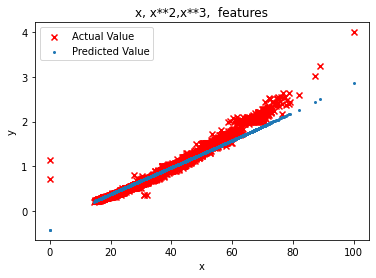

In [40]:
ypred = sgdr.predict(xtestsc) 
plt.scatter(xtest[:,1], ytest, marker='x', c='r', label="Actual Value"); plt.title("x, x**2,x**3,  features")
plt.scatter(xtest[:,1],ypred, label="Predicted Value", s = 4); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()

# Task: 3
3: what happens without feature scaling?

# with scaling

In [41]:
 # with scaling 
X = df['x'].values
x = np.c_[X, X**2]

xtrain,xtest,ytrain,ytest = train_test_split(x,y,  test_size= .15)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(45849, 2) (8091, 2) (45849,) (8091,)


In [42]:
# scaling feature
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(xtrain)
xtrainsc = sc.transform(xtrain)
xtestsc = sc.transform(xtest)

In [43]:
sgdr.fit(xtrainsc, ytrain)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:\n w: {w_norm}, \n b:{b_norm}")

-- Epoch 1
Norm: 0.27, NNZs: 2, Bias: 0.798925, T: 45849, Avg. loss: 0.009017
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 0.26, NNZs: 2, Bias: 0.799760, T: 91698, Avg. loss: 0.007806
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 0.26, NNZs: 2, Bias: 0.795014, T: 137547, Avg. loss: 0.007805
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 0.27, NNZs: 2, Bias: 0.800493, T: 183396, Avg. loss: 0.007826
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 0.27, NNZs: 2, Bias: 0.800219, T: 229245, Avg. loss: 0.007816
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 0.27, NNZs: 2, Bias: 0.799793, T: 275094, Avg. loss: 0.007805
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 0.27, NNZs: 2, Bias: 0.799694, T: 320943, Avg. loss: 0.007810
Total training time: 0.05 seconds.
Convergence after 7 epochs took 0.05 seconds
SGDRegressor(alpha=0.5, max_iter=100000, verbose=1)
number of iterations completed: 7, number of weight updates: 320944.0
model parameters:
 w: [0.18129031 0.1

In [44]:
sgdr.score(xtestsc,ytest)

0.9342419940569481

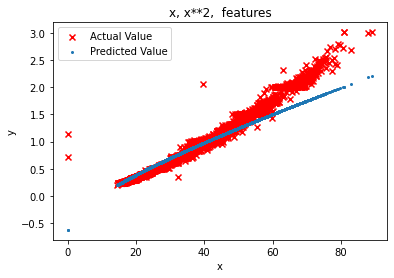

In [45]:
ypred = sgdr.predict(xtestsc) 
plt.scatter(xtest[:,1], ytest, marker='x', c='r', label="Actual Value"); plt.title("x, x**2,  features")
plt.scatter(xtest[:,1],ypred, label="Predicted Value", s = 4); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()

# without scaling

In [46]:
# without scaling 
X = df['x'].values
x = np.c_[X, X**2]

xtrain,xtest,ytrain,ytest = train_test_split(x,y,  test_size= .15)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(45849, 2) (8091, 2) (45849,) (8091,)


In [47]:
sgdr.fit(xtrain, ytrain)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:\n w: {w_norm}, \n b:{b_norm}")

-- Epoch 1
Norm: 675513961.85, NNZs: 2, Bias: 2789174399.459345, T: 45849, Avg. loss: 28919919731002698629120.000000
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 218226287.19, NNZs: 2, Bias: 896249771.300281, T: 91698, Avg. loss: 39960633976513928.000000
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 79649359.23, NNZs: 2, Bias: 331706946.089000, T: 137547, Avg. loss: 3788392152996262.500000
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 31794355.53, NNZs: 2, Bias: 132941208.794603, T: 183396, Avg. loss: 502904697628555.000000
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 13749520.69, NNZs: 2, Bias: 56301791.054672, T: 229245, Avg. loss: 80352886302543.453125
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 6002621.92, NNZs: 2, Bias: 24913511.488748, T: 275094, Avg. loss: 14327107447563.246094
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 2775042.75, NNZs: 2, Bias: 11391159.789488, T: 320943, Avg. loss: 2838134670136.562012
Total training time: 0.05 secon

In [48]:
sgdr.score(xtestsc,ytest)

-5.879486506994145

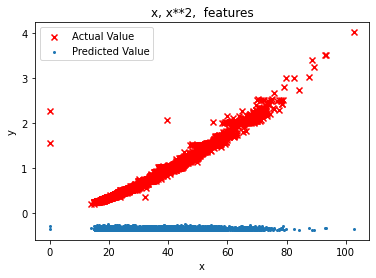

In [49]:
ypred = sgdr.predict(xtestsc) 
plt.scatter(xtest[:,1], ytest, marker='x', c='r', label="Actual Value"); plt.title("x, x**2,  features")
plt.scatter(xtest[:,1],ypred, label="Predicted Value", s = 4); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()

# Without feature scaling, gradient descent will require a lot more steps to reach the minima. In other words, gradient descent will take a lot of time to converge thus increasing the model training time.